In [9]:
import pandas as pd
import re
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk                         # Natural Language Toolkit
nltk.download('stopwords')          # Download stopwords data
from nltk.corpus import stopwords  # Stopwords corpus for text processing
from nltk.stem import SnowballStemmer  # Snowball stemming algorithm for text processing
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")


# Clone the dataset repository from GitHub
!git clone https://github.com/chanchalIITP/AuthorIdentification.git
# Load the dataset from GitHub
files_path = r'/content/AuthorIdentification/Dataset/Dataset_with_varying_number_of_tweets/1000_tweets_per_user.csv'
# Read the dataset from a CSV file
dataset = pd.read_csv(files_path)

fatal: destination path 'AuthorIdentification' already exists and is not an empty directory.


In [11]:
dataset.rename(columns={'0': 'Text',
                   '1': 'Author'},
          inplace=True, errors='raise')

In [12]:
# Define the number of samples to select from each class
num_samples = 900

# Get the unique class labels in the dataframe
unique_classes = dataset['Author'].unique()

# Create an empty list to store the sampled rows
sampled_rows = []

# For each unique class, randomly sample the desired number of rows
for cls in unique_classes:
    rows = dataset.loc[dataset['Author'] == cls]
    sampled = rows.sample(n=num_samples, replace=True, random_state=123)
    sampled_rows.append(sampled)

# Combine the sampled rows into a new dataframe
df_sampled = pd.concat(sampled_rows)

# Display the sampled dataframe
dataset=df_sampled

In [ ]:

# Perform data preprocessing
nltk.download('wordnet')
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(tokens)
#Apply preprocessing to the dataset
dataset['Text'] = dataset['Text'].apply(preprocess_text)


# Split the dataset into features (content) and target variable (author)
features = dataset['Text']
target = dataset['Author']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define a list to store the results
results = []

# Define a pipeline for each classifier with different vectorizers
classifiers = [


    ('KNN', [
    ('BoW', CountVectorizer()),
    ('TF-IDF', TfidfVectorizer()),
    ('Ngram (1,2)', CountVectorizer(ngram_range=(1, 2))),
    ('Combined (TF-IDF + N-gram (1, 3))',TfidfVectorizer(ngram_range=(1, 3))),
    ('Combined (TF-IDF + N-gram (2, 3))',TfidfVectorizer(ngram_range=(2, 3))),
    ('Combined (TF-IDF + N-gram (1, 4))',TfidfVectorizer(ngram_range=(1, 4))),
     ], KNeighborsClassifier()),

]

# Train and evaluate each classifier with different vectorizers
for name, vectorizers, classifier in classifiers:
    for vectorizer_name, vectorizer in vectorizers:
        # Define the pipeline for the classifier and vectorizer combination
        pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])

        # Train the classifier
        model = pipeline
        model.fit(X_train, y_train)

        # Predict the author for the test set
        predictions = model.predict(X_test)

        # Evaluate the accuracy of the model
        accuracy = accuracy_score(y_test, predictions)

        # Compute and print the confusion matrix
        cm = confusion_matrix(y_test, predictions)
        print(f"Confusion Matrix for {name} with {vectorizer_name}:\n{cm}")

        # Add the results to the list
        results.append({'Classifier': name, 'Feature Representation': vectorizer_name, 'Accuracy': accuracy})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the summarized results
print("\nResults Summary:")
print(results_df)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Confusion Matrix for KNN with BoW:
[[130   0   0 ...   0   0   0]
 [ 23  58   0 ...   0   0   0]
 [ 36   0  54 ...   0   0   0]
 ...
 [  0   0   0 ... 104   0   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]
Confusion Matrix for KNN with TF-IDF:
[[143   0   2 ...   0   0   0]
 [  2  94   1 ...   4   1   0]
 [  9   1  93 ...   1   1   0]
 ...
 [  0   1   0 ... 138   1   0]
 [  0   0   0 ...   0 172   0]
 [  0   0   0 ...   0   0 206]]
Confusion Matrix for KNN with Ngram (1,2):
[[126   0   0 ...   0   0   0]
 [ 53  47   0 ...   0   0   0]
 [ 71   0  48 ...   0   0   0]
 ...
 [  2   0   0 ...  82   0   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]
Confusion Matrix for KNN with Combined (TF-IDF + N-gram (1, 3)):
[[133   2   4 ...   0   1   0]
 [  1 112   1 ...   1   1   0]
 [  9   1  91 ...   0   1   0]
 ...
 [  0   0   0 ... 136   0   0]
 [  0   0   0 ...   0 173   0]
 [  0   0   0 ...   0   0 206]]
Confusion Matrix for KNN with Combined (TF-IDF + N-

In [ ]:


# Define a pipeline for each classifier with different vectorizers
#classifiers = [
 #   ('Linear SVM', [
  #      ('BoW', CountVectorizer()),
   #     ('TF-IDF', TfidfVectorizer()),
    #    ('Ngram (1,2)', CountVectorizer(ngram_range=(1, 2))),
     #   ('Ngram (1,2)', CountVectorizer(ngram_range=(2, 3))),
      #   ('Ngram (1,2)', CountVectorizer(ngram_range=(3, 4))),
       # ('Combined (TF-IDF + N-gram (1, 2))',TfidfVectorizer(ngram_range=(1, 2))),
        #('Combined (TF-IDF + N-gram (2, 3))',TfidfVectorizer(ngram_range=(2, 3))),
        #('Combined (TF-IDF + N-gram (3, 4))',TfidfVectorizer(ngram_range=(3, 4))),
        #('Combined (TF-IDF + BoW ))',TfidfVectorizer(CountVectorizer())),
    #], LinearSVC()),
#]



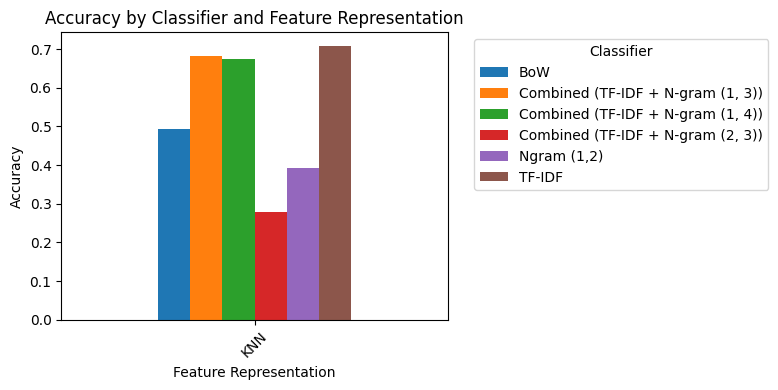

In [ ]:
import matplotlib.pyplot as plt
# Create a pivot table for plotting
pivot_table = results_df.pivot_table(columns='Feature Representation', index='Classifier', values='Accuracy')

# Plot
pivot_table.plot(kind='bar', figsize=(8, 4))
plt.title('Accuracy by Classifier and Feature Representation')
plt.xlabel('Feature Representation')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
# Saving and loading models
import pickle                           # For saving and loading models
from keras.models import load_model     # For loading saved Keras models
pickle.dump(classifier, open("KNNmodel.pkl", "wb"))